# WINDOW FUNCTION: TESS vs LIGHT CURVE
## LIGHT CURVE 

## TESS

#### Note on path and package import
Before importing user-defined package (`AROMA` in this case), you might want to `pip install <path/to/AROMA>` where `<path/to/AROMA>` is the folder containing `setup.py`.

In [1]:
from AROMA import *
from AROMA.utils import *
from AROMA.config import *
import pandas as pd
%matplotlib widget

import numpy.random as random
from astropy import units as u
import matplotlib.patches as patches
def: find_nearest(array, value)
def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)
def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)
def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)
def: powerfuncsingle(hpp,amp1,shift1)
data_dir :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data
data_path :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/luhman_16ab_sector36-37.txt
plot_dir :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/plots


In [2]:
data = pd.read_csv(data_path, header=0, delimiter='\t')
time=data.TIME*24
lc  =data.PSF_FLUX_NORM
elc =data.PSF_EFLUX

In [3]:
data_path

PosixPath('~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/luhman_16ab_sector36-37.txt')

In [4]:
# Calculate the window Function
wtime = np.linspace(0.,1100,10000)
window = np.zeros(10000)

# Replace data with test sine wave
mu, sigma = 1.0, 0.013 # mean and standard deviation
noise = random.normal(mu, sigma, len(time))
period1 = 5.26
period2 = 6.9
period2 = 4.69
sinelc = 1.0+0.05*np.sin(2*np.pi*(time/period1))+noise
#sinelc = sinelc+0.03*np.sin(2*np.pi*(time/period2))
# plt.plot(sinelc)

In [9]:
for ii in time:
   #print('Time value:',ii)
   ndx = find_nearest(wtime,ii)
   #print(ndx)
   window[ndx]=1.0

#elc=np.ones(10000)/1000.
#period = 15.
#lc = 0.5*np.sin(2*np.pi*(time/period))

frequen = np.linspace(0.003,10.,100000)

# Compute the GLS periodogram with default options.
# Choose Zechmeister-Kuerster normalization explicitly
clp = pyPeriod.Gls((time,lc,elc), norm="ZK", freq=frequen,ofac=10)

# Calculate the Periodogram for the Window Function
wlp = pyPeriod.Gls((wtime,window), norm="ZK", freq=frequen,ofac=10)
clp.info

sinelp=pyPeriod.Gls((time,sinelc), norm="ZK", freq=frequen,ofac=10)


(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7feb02b48d30>])

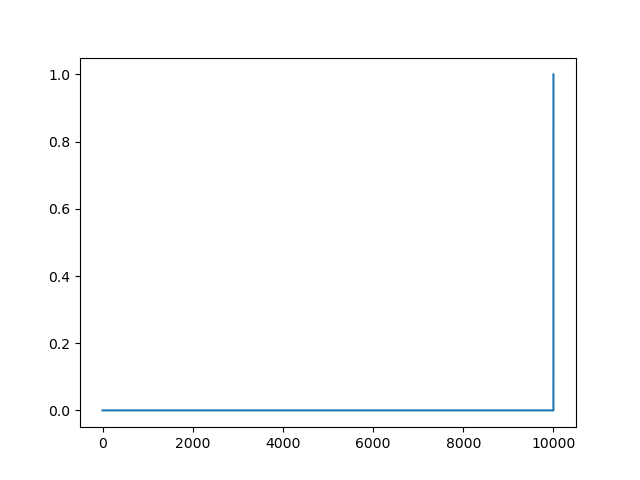

In [13]:
plt.figure(), plt.plot(window)

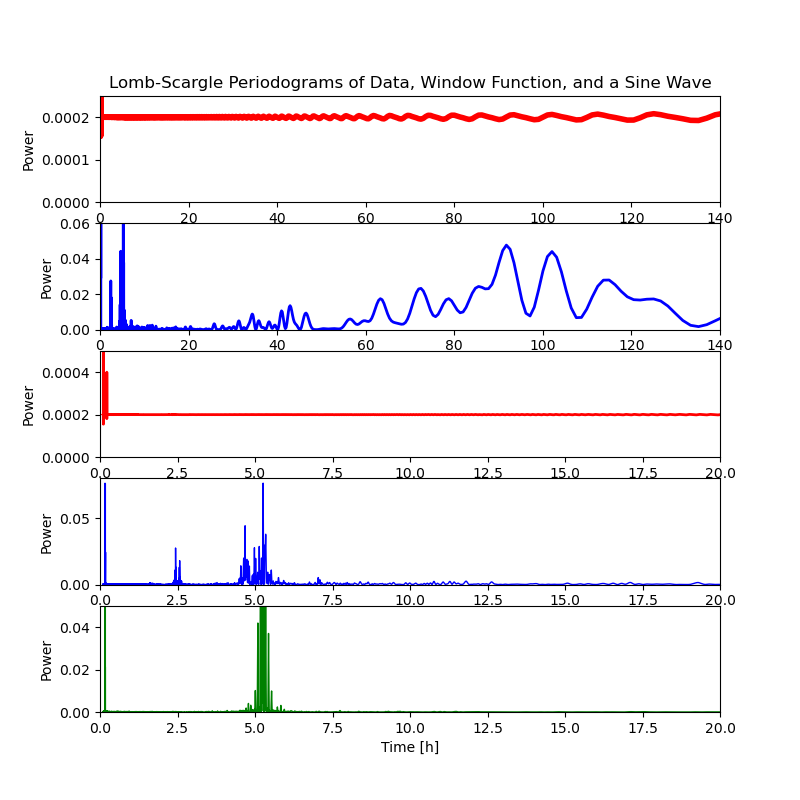

In [8]:
fig = plt.figure(figsize=(8,8))
matplotlib.rcParams.update({'font.size': 10})

fr = clp.freq
pw = clp.power
hpp = 1./fr

wfr = wlp.freq
wpw = wlp.power
whpp = 1./wfr

sinefr = sinelp.freq
sinepw = sinelp.power
sinehpp=1./sinefr

plt.subplot(5,1,1)
#plt.subplots_adjust(hspace=0.34)

#======================================= [1/5]
plt.title("Lomb-Scargle Periodograms of Data, Window Function, and a Sine Wave")
plt.plot(whpp, wpw, '-', linewidth=4,color='red')
plt.ylim([0.00,0.00025])
plt.xlim([0,140])
# plt.text(70.0,0.003,'Window Function',horizontalalignment='center',fontsize=18)
plt.ylabel('Power')

#plt.plot([2.,2.,19,19],[0.0008,0.001,0.001,0.0008],'-',linewidth=0.5,color='xkcd:red')
#plt.plot([10.5,30],[0.001,0.0018],'-',linewidth=0.5,color='xkcd:red')
#plt.text(10.0,0.002,'Window Function')

#======================================= [2/5]
# Now plot the actual LS of the Data
plt.subplot(5,1,2)
#plt.title("L-S Periodogram of the Luhman 16 TESS Lightcurve")
# plt.text(70.0,0.4,'Luhman 16 Data',horizontalalignment='center',fontsize=18)

plt.plot(hpp, pw, '-', linewidth=2,color="blue")
#plt.xlabel('Time [h]')
plt.ylabel('Power')

xx=121.
yy=0.15
# plt.plot([xx,xx],[yy,0.23],color='black',linewidth=0.7)
# plt.text(xx,0.25,'Window function artifact',horizontalalignment='center',fontsize=11)

xx=90.8
yy=0.22
# plt.plot([xx,xx],[yy,0.30],color='black',linewidth=0.7)
# plt.text(xx,0.32,'Contaminated real period',horizontalalignment='center',fontsize=11)

xx=5.2
yy=0.20
# plt.plot([xx,xx],[yy,0.24],color='black',linewidth=0.7)
# plt.text(xx-2.0,0.26,'Rotational period of Luhman 16B',horizontalalignment='left',fontsize=11)

plt.xlim([0,140])
plt.ylim([0.,0.06])

#======================================= [3/5]
# Now plot the actual LS of the Data
plt.subplot(5,1,3)
#plt.title("Window Function L-S Periodogram Up to 20 Hours")
# plt.text(10.0,0.0008,'Window Function',horizontalalignment='center',fontsize=18)
plt.plot(whpp, wpw, '-', linewidth=2,color='red')
#plt.xlabel('Time [h]')

plt.ylabel('Power')
plt.xlim([0,20])
plt.ylim([0.,0.0005])

#======================================= [4/5]
# Now plot the actual LS of the Data
plt.subplot(5,1,4)
#plt.title("L-S Periodogram of the Luhman 16 TESS Lightcurve")
# plt.text(10.0,0.062,'Luhman 16 Data',horizontalalignment='center',fontsize=18)
plt.plot(hpp, pw, '-', linewidth=1,color='blue')
plt.xlabel('Time [h]')
plt.ylabel('Power')

xx=121.
yy=0.15
# plt.plot([xx,xx],[yy,0.23],color='black',linewidth=0.7)
# plt.text(xx,0.25,'Window function artifact',horizontalalignment='center',fontsize=11)

xx=7.1
yy=0.017
# plt.plot([xx,xx+1.3],[yy,0.028],color='black',linewidth=0.7)
# plt.text(xx+1.3,0.030,"Rotational Period of Luhman 16A",horizontalalignment='left',fontsize=11)

# plt.plot([5.4,5.8],[0.045,0.045],color='black',linewidth=0.7)
# plt.text(5.85,0.045,'Rotational Period of Luhman 16B',horizontalalignment='left',fontsize=11)

xx=2.46
yy=0.020
# plt.plot([xx,xx],[yy,0.03],color='black',linewidth=0.7)
# plt.text(xx,0.034,'k=2 wave?',horizontalalignment='center',fontsize=11)


plt.xlim([0,20])
plt.ylim([0,0.080])

#======================================= [5/5]
# Now plot the LS of a P=5.28 hour sine wave
plt.subplot(5,1,5)
#plt.title("L-S Periodogram of the Luhman 16 TESS Lightcurve")
# plt.text(13.0,0.062,'Noise-added P=5.28 h sine wave',horizontalalignment='center',fontsize=18)
plt.plot(sinehpp, sinepw, '-', linewidth=1,color='green')
plt.xlabel('Time [h]')
plt.ylabel('Power')
plt.xlim([0,20])
plt.ylim([0,0.05])

plt.show()